<a href="https://colab.research.google.com/github/SaYMy-NaMe/ML_Assignment/blob/main/Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import os

Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Setup file paths for dataset

In [12]:
train_folder= '/content/gdrive/MyDrive/ML/Archive/train'
val_folder = '/content/gdrive/MyDrive/ML/Archive/val'
test_folder = '/content/gdrive/MyDrive/ML/Archive/test'
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

Define and compile the CNN model

In [14]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(32, (3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(activation='relu', units=128))
cnn_model.add(Dense(activation='sigmoid', units=1))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Data Augmentation and preparation

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow_from_directory(train_folder, target_size=(64, 64), batch_size=32, class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(val_folder, target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_folder, target_size=(64, 64), batch_size=32, class_mode='binary')

Found 5276 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Train the CNN model

In [16]:
cnn_model_his = cnn_model.fit_generator(train_set, steps_per_epoch=163, epochs=10, validation_data=validation_generator, validation_steps=624)

163/163 [==============================] - ETA: 0s - loss: 0.3168 - accuracy: 0.8594

163/163 [==============================] - 817s 5s/step - loss: 0.3168 - accuracy: 0.8594 - val_loss: 0.4342 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 119s 729ms/step - loss: 0.2267 - accuracy: 0.9069
Epoch 3/10
163/163 [==============================] - 116s 712ms/step - loss: 0.2018 - accuracy: 0.9215
Epoch 4/10
163/163 [==============================] - 119s 729ms/step - loss: 0.1808 - accuracy: 0.9286
Epoch 5/10
163/163 [==============================] - 113s 694ms/step - loss: 0.1898 - accuracy: 0.9248
Epoch 6/10
163/163 [==============================] - 118s 724ms/step - loss: 0.1693 - accuracy: 0.9367
Epoch 7/10
163/163 [==============================] - 111s 683ms/step - loss: 0.1544 - accuracy: 0.9426
Epoch 8/10
163/163 [==============================] - 114s 699ms/step - loss: 0.1477 - accuracy: 0.9428
Epoch 9/10
163/163 [==============================] - 112s 688ms/step - loss: 0.1547 - accuracy: 0.9422
Epoch 10/10
163/163 [===============

Evaluate and display the testing accuracy

In [17]:
test_acc = cnn_model.evaluate_generator(test_set, steps=624)
print('The testing accuracy is:', test_acc[1] * 100, '%')

<ipython-input-17-79f665cab925>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_acc = cnn_model.evaluate_generator(test_set, steps=624)


The testing accuracy is: 87.33974099159241 %


Plot the training and validation accuracy over epochs

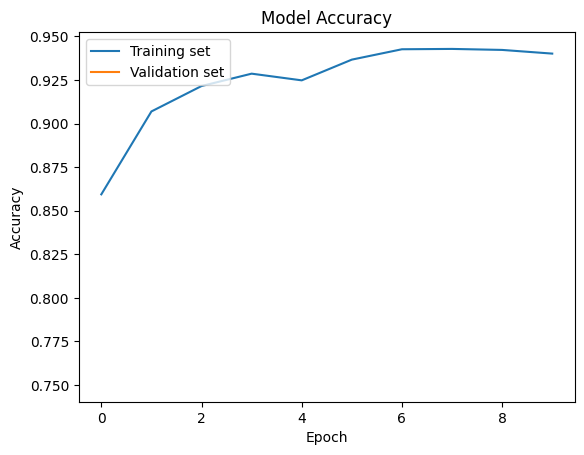

In [19]:
plt.plot(cnn_model_his.history['accuracy'])
plt.plot(cnn_model_his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()